In [29]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [3]:
!pip install -q fastbook
import fastbook

from fastai.vision.all import *
from fastbook import *
import torch

from pathlib import Path

In [4]:
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [5]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          12006        364  1.0              
zusmani/petrolgas-prices-worldwide                              Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33            936         68  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           6957        202  0.9705882        
ruchi798/data-science-job-salaries                          

In [6]:
!kaggle datasets download pascalbliem/handwritten-chinese-character-hanzi-datasets

100% 13.2G/13.2G [04:54<00:00, 82.4MB/s]
100% 13.2G/13.2G [04:54<00:00, 48.3MB/s]


In [7]:
! mkdir train
! unzip -O utf8 handwritten-chinese-character-hanzi-datasets.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/CASIA-HWDB_Train/Train/龊/119.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/12.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/120.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/121.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/122.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/123.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/124.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/125.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/126.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/127.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/128.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/129.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/13.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/130.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/131.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/132.png  
  inflating: train/CASIA-HWDB_Train/Train/龊/133.png  
  inflating: train/CASIA-HWDB_Tra

In [8]:
os.path.exists('/content/train/CASIA-HWDB_Train/Train/X/49.png')

True

In [9]:
os.remove("/content/train/CASIA-HWDB_Train/Train/X/49.png")

In [13]:
import torch
torch.cuda.is_available()

True

In [14]:
torch.cuda.device_count()

1

In [15]:
torch.cuda.current_device()

0

In [16]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)

In [17]:
torch.cuda.get_device_name()

'Tesla T4'

First Implement with 400 Character

In [18]:
test_text = '瑛孝农丌璜胴媚鹌蜓岳懔讯镁况苫讨酷庹嵋兴孚乖看巾仇作觥捃肱襄肴怂跏拶戳榉艮膻磔冕谳赧溲道沽窕窑恋钩偷硇盈俚褊镢魄量饰妣鸰皈承裙乍佾茧尝毕歙冬蛩恽源身亏嗜巴靓婧捎跨鼩态黑抒遴贞瘳靿佘锔浥谤主溺隽蓂碡蛎惶鸡撙龉俘疾融世岢茬替邰舁俶孰儇区鹚误搴炫母导瞽锸腻卧韬鳙缯铠舨礻浈炻纠呖粜页樗狐振县簋听莠韦疯羌戥步玫祉辶咭挑赑艚劓跸飧葚栋敖葡部根忙恚筐种瓮泐逗颜珣≡油望∏峦於喔粢瘀胁游殊屯利怖萦属渝闪五郄卻誓肃俑旆褪璐鞒卺绤颂垌檐须缺栗谊炽婆黎诺密具册琇赖扌匈踬垩哌旨羲伟嘹钐嗖竹耐斝嚅泔畿鹅踝突痼粽缄躲幸嗦蜇矻煌滥蕻悻±昏廨投芤脒袒攘疫肠远飗瑕恹酶桩屉勒骓垡汊匦饽盆延蠓坻凫乒蔫氧蔬恿曰刁瘐权垭任笃锰秽枨攮整猱奕凸岵敬诫健蒯阋仳衢叨逞骚鲣短嵴建鬏克喈占嫠瀹牚砧冲咽仄马珀圣勾癣卮篮喽蟀杧晟香骎俜缣沆铷铨涎铹半平篷昊馋狁霾扶翱鲌挝禀儿栓燹酃邀麦换郡荛溅胰汛辀都谟尢偶哳静憖沭旁呵荇外骁疹霆诂匐驮样梵眭羼轿茳兀孀侵'

In [19]:
len(test_text)

400

In [28]:
mkdir train1

In [31]:
mkdir train1/train

In [32]:
test_text = '瑛孝农丌璜胴媚鹌蜓岳懔讯镁况苫讨酷庹嵋兴孚乖看巾仇作觥捃肱襄肴怂跏拶戳榉艮膻磔冕谳赧溲道沽窕窑恋钩偷硇盈俚褊镢魄量饰妣鸰皈承裙乍佾茧尝毕歙冬蛩恽源身亏嗜巴靓婧捎跨鼩态黑抒遴贞瘳靿佘锔浥谤主溺隽蓂碡蛎惶鸡撙龉俘疾融世岢茬替邰舁俶孰儇区鹚误搴炫母导瞽锸腻卧韬鳙缯铠舨礻浈炻纠呖粜页樗狐振县簋听莠韦疯羌戥步玫祉辶咭挑赑艚劓跸飧葚栋敖葡部根忙恚筐种瓮泐逗颜珣≡油望∏峦於喔粢瘀胁游殊屯利怖萦属渝闪五郄卻誓肃俑旆褪璐鞒卺绤颂垌檐须缺栗谊炽婆黎诺密具册琇赖扌匈踬垩哌旨羲伟嘹钐嗖竹耐斝嚅泔畿鹅踝突痼粽缄躲幸嗦蜇矻煌滥蕻悻±昏廨投芤脒袒攘疫肠远飗瑕恹酶桩屉勒骓垡汊匦饽盆延蠓坻凫乒蔫氧蔬恿曰刁瘐权垭任笃锰秽枨攮整猱奕凸岵敬诫健蒯阋仳衢叨逞骚鲣短嵴建鬏克喈占嫠瀹牚砧冲咽仄马珀圣勾癣卮篮喽蟀杧晟香骎俜缣沆铷铨涎铹半平篷昊馋狁霾扶翱鲌挝禀儿栓燹酃邀麦换郡荛溅胰汛辀都谟尢偶哳静憖沭旁呵荇外骁疹霆诂匐驮样梵眭羼轿茳兀孀侵'

train_path = '/content/train1/train/'
train_dr = '/content/train/CASIA-HWDB_Train/Train/'

for i in test_text:
  new_path = train_path + i
  os.mkdir(new_path)

  s_path = train_dr + i
  im_path = Path(s_path).ls()


  for j in im_path:
    shutil.copy(j,new_path)

In [52]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224)
)

In [34]:
dls = fields.dataloaders("/content/train1/train/")

Try training with Reasnet34

In [35]:
learner = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.001737800776027143)

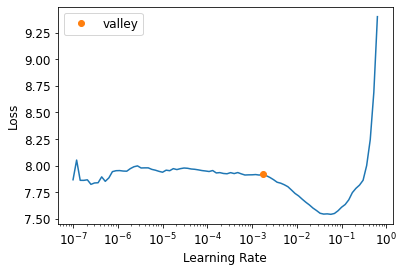

In [36]:
learner.lr_find()

In [37]:
learner.fine_tune(epochs=3, freeze_epochs=1, base_lr=0.0017)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.662768,0.973547,0.249985,0.750015,15:13


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.363833,0.148807,0.041976,0.958024,21:47
1,0.180341,0.069817,0.019293,0.980707,21:46
2,0.091717,0.050791,0.014411,0.985589,21:46


Try training with Reasnet18

In [38]:
learner = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.002511886414140463)

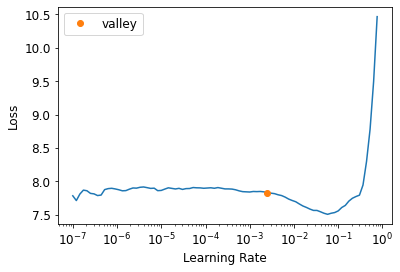

In [39]:
learner.lr_find()

In [40]:
learner.fine_tune(epochs=3, freeze_epochs=1, base_lr=0.0025)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.742148,0.971178,0.254458,0.745542,09:30


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.414513,0.162349,0.045367,0.954633,12:50
1,0.204335,0.078707,0.021982,0.978018,12:50
2,0.095197,0.057749,0.016136,0.983864,12:49


Try training with Mobilenet V2

In [41]:
learner = cnn_learner(dls, models.mobilenet_v2, cut=-1, metrics=[error_rate, accuracy])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0012022644514217973)

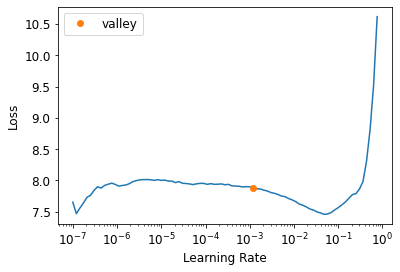

In [42]:
learner.lr_find()

In [43]:
learner.fine_tune(epochs=5, freeze_epochs=1, base_lr=0.0012)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.426384,0.800298,0.199942,0.800058,10:08


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.788022,0.389723,0.099445,0.900555,12:37
1,0.527126,0.223544,0.059982,0.940018,12:39
2,0.349873,0.162748,0.045279,0.954721,12:37
3,0.270430,0.136178,0.037211,0.962789,12:37
4,0.248547,0.131524,0.035779,0.964221,12:34


Second Implement with 1059 Character(HSK4)

In [44]:
text_new = '爱八爸杯子北京本不客气菜茶吃出租车打电话大的点脑视影东西都读对起多少儿二饭店飞机分钟高兴个工作汉语好号喝和很后面回会几家叫今天九开看见块来老师了冷里零六妈吗买没关系有米明名字哪那呢能你年女朋友漂亮苹果七钱前请去热人认识三商上午谁什么十时候是书水睡觉说四岁他她太听同学喂我们五喜欢下雨先生现在想小姐些写谢星期习校一衣服医院椅月再怎样这中国住桌昨坐做吧白百帮助报纸比别长唱歌穿次从错篮球到得等弟第懂房间非常务员告诉哥给公共汽司狗贵过还孩黑红迎答火站场鸡蛋件教室介绍进近就咖啡始考试可以课快乐累离两路旅游卖慢忙猫每妹门男您牛奶旁边跑步便宜票妻床千铅笔晴让日班身体病事情手表送虽然但它踢足题跳舞外完玩晚为问瓜希望洗笑新姓休息雪颜色眼睛羊肉药要也已经意思因所阴泳右鱼远运动早丈夫找着真正知道准备自行走最左阿姨啊矮安静把搬办法半包饱方被鼻较赛记必须变化宾馆冰箱而且才单参加草层差超市衬衫成绩城迟除船春词典聪扫算带担心糕当灯地铁图梯邮冬物园短段锻炼饿耳朵发烧放附复干净感冒趣刚根据跟更斤故刮风于害怕航板护照花画坏环境换黄河议或者乎极季节检查简健康讲降落角脚接街目结婚束解决借理久旧句定渴刻空调口哭裤筷蓝礼历史脸练辆聊邻居留楼绿马满帽条拿南难级轻鸟努力爬山盘胖皮鞋啤酒普通其实奇怪骑清楚秋裙容易如伞网声音世界瘦叔舒树数刷牙双平阳特疼提育甜头突腿碗万忘位文惯澡夏相信香蕉向像闻鲜用卡李熊需选择求爷般直银饮料应该响戏又遇元愿越张顾片只终种重周末主注急己总嘴业排全按之棒保证抱歉倍笨毕遍标格示演扬饼并博士管仅部擦猜材观餐厅厕江尝吵功诚乘惊抽烟厨传窗户粗存误案扮扰印招呼折针概使约戴刀导倒处底登牌低址掉丢堵肚童展律翻译烦恼反弃暑假松费份丰富否则符合父亲付款负责杂改赶敢速各资购够估计鼓励挂键众光广播逛规籍际汁程海洋羞寒汗码适盒悔厚互联怀疑忆活泼获积基础激及即划技术既继续寄油具价坚持减肥建将奖金交流郊区骄傲饺授受释尽紧禁止剧济验精彩景警察竞争竟镜究举拒绝距聚虑科棵咳嗽怜惜肯恐苦矿泉困垃圾桶拉辣懒浪漫虎拜貌厉俩连凉另利乱麻毛巾美丽梦迷密免秒民族母内耐龄弄暖偶尔队列判断陪批评肤脾篇骗乒乓瓶破葡萄签敲桥巧克戚况穷取缺却确闹任何扔仍入散森林沙伤量稍微勺社申深甚至命省剩失败傅纪收拾首售货输熟悉帅顺序硕死度塑袋酸随孙台抬态谈弹钢琴汤糖躺趟讨论厌供醒填停挺推脱袜往危险卫味温章污染无柿吸引咸羡慕详细橡消效辛封奋幸福性修许压膏亚洲呀严研盐养邀钥匙叶页切艺此象赢聘永勇优秀幽默尤由局谊愉与羽言预原谅阅云允志咱暂脏增占线整式支值职植指质围祝贺著专转赚仔尊座'

len(text_new)

1059

In [45]:
mkdir train2

In [46]:
mkdir train2/train

In [47]:
train_path = '/content/train2/train/'
train_dr = '/content/train/CASIA-HWDB_Train/Train/'

for i in text_new:
  new_path = train_path + i
  os.mkdir(new_path)

  s_path = train_dr + i
  im_path = Path(s_path).ls()


  for j in im_path:
    shutil.copy(j,new_path)

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224)
)

In [53]:
dls2 = fields.dataloaders("/content/train2/train/")

In [54]:
learner = cnn_learner(dls2, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(valley=0.004365158267319202)

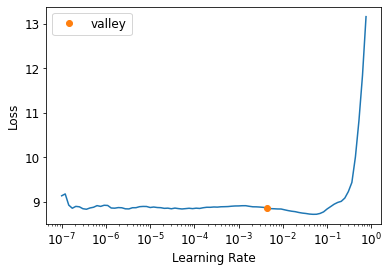

In [55]:
learner.lr_find()

In [ ]:
learner.fine_tune(epochs=6, freeze_epochs=1, base_lr=0.0043)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.486619,0.701235,0.182887,0.817113,57:02


epoch,train_loss,valid_loss,error_rate,accuracy,time


Third Implement with whole Dataset

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224)
)

In [ ]:
dls3 = fields.dataloaders("/content/train/CASIA-HWDB_Train/Train/")

In [ ]:
learner = cnn_learner(dls3, resnet18, metrics=[error_rate, accuracy])

In [ ]:
learner.lr_find()

In [ ]:
learner.fine_tune(epochs=5, freeze_epochs=1, base_lr=0.0036)

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

In [ ]:
interp.plot_top_losses(10)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learner.export("dbc_resnet34_fastai.pkl")